In [1]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.3 MB/s eta 0:00:00


In [3]:
import pyLDAvis
import pyLDAvis.gensim_models
import pandas as pd
import pickle
import os
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('BA_reviews.csv')

In [5]:
df

Unnamed: 0                                            reviews
0              0  Not Verified |   I flew from Malaga via LHR to...
1              1  ✅ Trip Verified |  Milan to Miami return via L...
2              2  ✅ Trip Verified |  BA created a new low-cost s...
3              3  ✅ Trip Verified |   I flew with British Airway...
4              4  ✅ Trip Verified |  Manchester to Copenhagen vi...
...          ...                                                ...
3790        3790  YYZ to LHR - July 2012 - I flew overnight in p...
3791        3791  LHR to HAM. Purser addresses all club passenge...
3792        3792  My son who had worked for British Airways urge...
3793        3793  London City-New York JFK via Shannon on A318 b...
3794        3794  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3795 rows x 2 columns]

In [6]:
df = df.rename(columns = {'Unnamed: 0':'Id'})

In [7]:
df.head()

Id                                            reviews
0   0  Not Verified |   I flew from Malaga via LHR to...
1   1  ✅ Trip Verified |  Milan to Miami return via L...
2   2  ✅ Trip Verified |  BA created a new low-cost s...
3   3  ✅ Trip Verified |   I flew with British Airway...
4   4  ✅ Trip Verified |  Manchester to Copenhagen vi...

In [8]:
df['reviews'] = \
df['reviews'].map(lambda x: re.sub('[,\.!?]', '', x))

In [9]:
df['reviews'] = \
df['reviews'].map(lambda x : x.lower())

In [10]:
df['reviews']

0       not verified |   i flew from malaga via lhr to...
1       ✅ trip verified |  milan to miami return via l...
2       ✅ trip verified |  ba created a new low-cost s...
3       ✅ trip verified |   i flew with british airway...
4       ✅ trip verified |  manchester to copenhagen vi...
                              ...                        
3790    yyz to lhr - july 2012 - i flew overnight in p...
3791    lhr to ham purser addresses all club passenger...
3792    my son who had worked for british airways urge...
3793    london city-new york jfk via shannon on a318 b...
3794    sin-lhr ba12 b747-436 first class old aircraft...
Name: reviews, Length: 3795, dtype: object

In [11]:
long_string = ','.join(list(df['reviews'].values))
long_string

'not verified |   i flew from malaga via lhr to boston on the 4th may 2024 and on arrival in boston discovered my luggage was still in london filed a report and now 4 days later no sign of the luggage the baggage customer service is a joke not interested in the clients or giving a good service updates are useless i know my luggage has been sitting in boston since the 5th as i have an air tag inside it the airline seem to have no intention of getting my luggage to me the robots on fb messenger & twitter are useless i opened a complaint & when i checked the update of my complaint the case had been closed despite never been contacted by a human this airline is now a joke and if i ever get my luggage back i doubt i will ever fly with them again they are now worse than air canada in my book and that is saying something,✅ trip verified |  milan to miami return via london worst business class ever the layout of a380 of ba is crazy the width of seats is outrageous (aisle seats are a shame for 

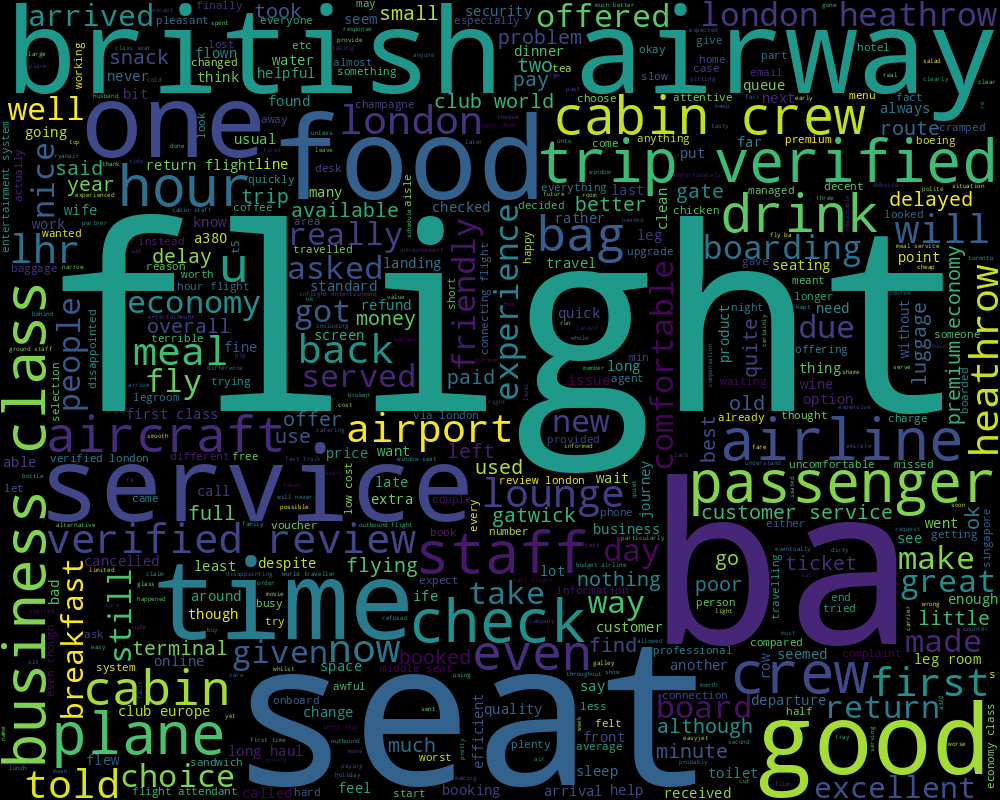

In [12]:
wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3, contour_color='steelblue',
                      width=1000, height=800).generate(long_string)
wordcloud.to_image()

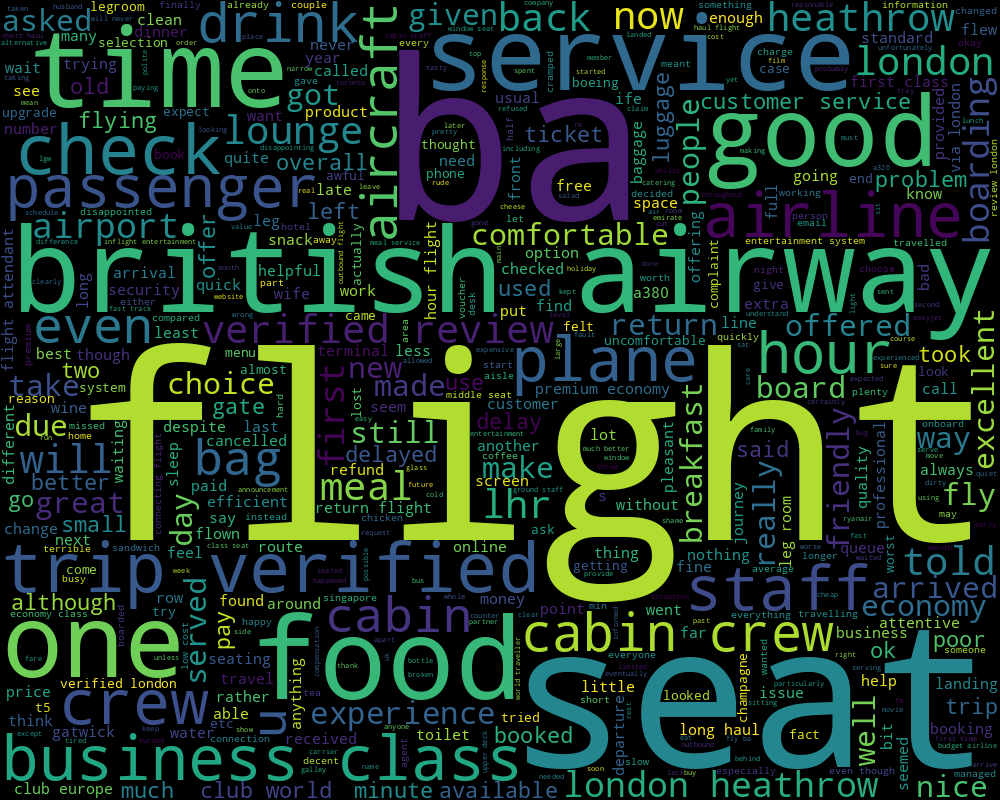

In [13]:

wordcloud = WordCloud(background_color="black", max_words=500, contour_width=3, contour_color='steelblue',
                      width=1000, height=800).generate(long_string)
wordcloud.to_image()

In [14]:
stop_words = stopwords.words('english')
stop_words.extend(['flight','british','airway','ba','verified','airline'])
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc))
  if word not in stop_words] for doc in texts]

data = df.reviews.to_list()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1])

[['flew', 'malaga', 'via', 'lhr', 'boston', 'th', 'may', 'arrival', 'boston', 'discovered', 'luggage', 'still', 'london', 'filed', 'report', 'days', 'later', 'sign', 'luggage', 'baggage', 'customer', 'service', 'joke', 'interested', 'clients', 'giving', 'good', 'service', 'updates', 'useless', 'know', 'luggage', 'sitting', 'boston', 'since', 'th', 'air', 'tag', 'inside', 'seem', 'intention', 'getting', 'luggage', 'robots', 'fb', 'messenger', 'twitter', 'useless', 'opened', 'complaint', 'checked', 'update', 'complaint', 'case', 'closed', 'despite', 'never', 'contacted', 'human', 'joke', 'ever', 'get', 'luggage', 'back', 'doubt', 'ever', 'fly', 'worse', 'air', 'canada', 'book', 'saying', 'something']]


In [15]:
len(data_words)

3795

In [16]:
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 5), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1)]]


In [17]:
id2word

In [18]:
from pprint import pprint
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"time" + 0.010*"good" + 0.010*"service" + 0.008*"crew" + '
  '0.008*"staff" + 0.007*"food" + 0.007*"seat" + 0.007*"class" + '
  '0.007*"airways" + 0.007*"lhr"'),
 (1,
  '0.012*"service" + 0.007*"class" + 0.007*"get" + 0.007*"seats" + '
  '0.007*"food" + 0.006*"time" + 0.006*"one" + 0.006*"airways" + 0.006*"seat" '
  '+ 0.005*"first"'),
 (2,
  '0.010*"airways" + 0.009*"london" + 0.008*"food" + 0.008*"seats" + '
  '0.008*"seat" + 0.007*"class" + 0.007*"time" + 0.007*"business" + '
  '0.006*"good" + 0.006*"economy"'),
 (3,
  '0.014*"service" + 0.011*"airways" + 0.010*"cabin" + 0.010*"good" + '
  '0.008*"seat" + 0.008*"would" + 0.007*"crew" + 0.006*"economy" + '
  '0.006*"food" + 0.006*"check"'),
 (4,
  '0.015*"seat" + 0.010*"crew" + 0.009*"good" + 0.009*"food" + 0.009*"time" + '
  '0.008*"seats" + 0.008*"service" + 0.007*"airways" + 0.006*"cabin" + '
  '0.005*"economy"'),
 (5,
  '0.008*"flights" + 0.007*"seats" + 0.007*"service" + 0.007*"london" + '
  '0.006*"seat" + 0.006*"

In [19]:
pyLDAvis.enable_notebook()
master_path = 'C:/Users/Yash/Desktop/DS_BritishAirways/'
os.makedirs(os.path.join(master_path, '02_results'), exist_ok=True)
LDAvis_data_filepath = os.path.join(master_path, '02_results', 'ldavis_prepared_' + str(num_topics))

if 1==1:
  LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
  with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared,'ldavis_prepared_'+str(num_topics)+'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.003586 -0.001278       1        1  21.320216
0      0.008227 -0.000061       2        1  11.243817
7      0.018369  0.006826       3        1  11.190731
6     -0.003662 -0.002598       4        1  10.442187
2     -0.008545 -0.003015       5        1   9.825951
9      0.012076 -0.004876       6        1   8.805275
4      0.010813 -0.002389       7        1   8.407779
3      0.002193 -0.007147       8        1   8.130747
5     -0.023078 -0.011864       9        1   7.512223
1     -0.012808  0.026402      10        1   3.121074, topic_info=         Term         Freq        Total Category  logprob  loglift
46    service  2747.000000  2747.000000  Default  30.0000  30.0000
243      seat  2462.000000  2462.000000  Default  29.0000  29.0000
433      time  2055.000000  2055.000000  Default  28.0000  28.0000
102     seats  2236.000000  2236.000000  Default  27.0000  27.0000
26       good  2171.000000  2171.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
34        lhr    32.991475  1311.702281  Topic10  -5.6493  -0.2158
35     london    37.911064  2021.419412  Topic10  -5.5103  -0.5093
222     plane    30.124609  1075.304836  Topic10  -5.7402  -0.1080
73       crew    34.434903  2202.837989  Topic10  -5.6065  -0.6914
172  heathrow    31.751778  1514.579099  Topic10  -5.6876  -0.3980

[799 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
11983      3  0.800911       abreat
12794      5  0.427530  accountable
12154      7  0.459287      acrobat
12478      5  0.427574   activation
10827      2  0.536319      advisor
...      ...       ...          ...
7666       7  0.116899          yyz
7666       8  0.058449          yyz
7666       9  0.058449          yyz
7666      10  0.029225          yyz
5162       6  0.351997          zhr

[1994 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 8, 7, 3, 10, 5, 4, 6, 2])